# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from path import Path
import nltk as nltk
nltk.download('vader_lexicon')
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Taylor\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [29]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [30]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)
print(newsapi)

In [32]:
# Fetch the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(
    q="bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_articles["totalResults"]

8512

In [99]:
# Fetch the Ethereum news articles
ethereum_articles = newsapi.get_everything(
    q="ethereum",
    language="en"
)

# Show the total number of news
ethereum_articles["totalResults"]

3896

In [100]:
#Create a news Dataframe

def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [45]:
# Create a DataFrame with the Bitcoin News
bitcoin_df = create_df(bitcoin_articles["articles"], "en")
#Save each to CSV.
file_path_btc = Path("../Resources/bitcoin_news.csv")
bitcoin_df.to_csv(file_path_btc, index=False, encoding='utf-8-sig')

# Create a DataFrame with the Etherwum News
ethereum_df = create_df(ethereum_articles["articles"], "en")
file_path_eth = Path("../Resources/eth_news.csv")
ethereum_df.to_csv(file_path_eth, index=False, encoding='utf-8-sig')

In [46]:
# I will create the function to build the sentiment scores dataframe
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

In [51]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment_df = get_sentiment_score(bitcoin_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
15,0.2500,0.090,0.765,0.145,By Reuters Staff\r\nJan 26 (Reuters) - The U.S...
16,-0.4404,0.088,0.912,0.000,Jack Dorsey onstage at a bitcoin convention in...
17,0.5859,0.000,0.876,0.124,The news of one of the biggest money launderin...
18,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla..."
19,-0.2960,0.151,0.729,0.120,"In one 2020 article for the magazine, she expl..."


In [48]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(ethereum_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,1.000,0.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi..."
3,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla..."
4,-0.2023,0.062,0.899,0.039,If people who buy cryptocurrencies intended on...
5,0.0000,0.000,1.000,0.000,This enables an L1 platform to bootstrap its n...
6,-0.1027,0.067,0.877,0.056,Trading platform Crypto.com lost about $34 mil...
7,0.0000,0.000,1.000,0.000,"The means-and-ends moralists, or non-doers, al..."
8,0.4019,0.000,0.915,0.085,Ethereum is a digital platform that runs on bl...
9,-0.0557,0.047,0.911,0.041,Crypto bros never tire of sharing their utopia...


In [54]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.006585,0.046350,0.896700,0.056950
std,0.422852,0.056707,0.069472,0.059066
min,-0.709600,0.000000,0.729000,0.000000
25%,-0.426225,0.000000,0.874750,0.000000
50%,0.038600,0.000000,0.912000,0.048500
75%,0.328950,0.088000,0.934000,0.108750
max,0.680800,0.169000,1.000000,0.185000


In [55]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.022100,0.924650,0.053250
std,0.297967,0.045603,0.074845,0.054394
min,-0.680800,0.000000,0.775000,0.000000
25%,0.000000,0.000000,0.889750,0.000000
50%,0.000000,0.000000,0.931500,0.043500
75%,0.233900,0.011750,1.000000,0.090250
max,0.680800,0.174000,1.000000,0.185000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score with .0569.

Q: Which coin had the highest compound score?

A: Strangely, they both had a compound score of 0.680800

Q. Which coin had the highest positive score?

A: They both had a high score of 0.185000. I'm guessing it's because there was an faulty recognition error in one of the articles

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [57]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [60]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!


In [61]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text 
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)

   
    # Create a tokenized list of the words 
    words = word_tokenize(re_clean.lower())
    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]

   
    # Convert the words to lowercase  
    tokens = [word.lower() for word in words if word.lower() not in set(stopwords.words('english'))]
    
    
    # Remove the stop words
    
    
    return tokens

In [63]:
# Create a new tokens column for Bitcoin
btc_sentiment_df["tokens"] = btc_sentiment_df["content"].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.5859,0.000,0.876,0.124,Even if you arent paying attention to Bitcoin ...,"[even, arent, paying, attention, bitcoin, cryp..."
1,0.0000,0.000,1.000,0.000,When Denis Rusinovich set up cryptocurrency mi...,"[denis, rusinovich, set, cryptocurrency, minin..."
2,0.3182,0.000,0.895,0.105,El Salvador introduced Bitcoin as a legal tend...,"[el, salvador, introduced, bitcoin, legal, ten..."
3,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...,"[officially, building, open, bitcoin, mining, ..."
4,-0.3182,0.084,0.871,0.045,Israeli national Tal Prihar pled guilty to rou...,"[israeli, national, tal, prihar, pled, guilty,..."


In [64]:
# Create a new tokens column for Ethereum
eth_sentiment_df["tokens"] = eth_sentiment_df["content"].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836...","[new, blog, post, company, said, 4836, eth, 44..."
1,0.0000,0.000,1.000,0.000,Hackers who made off with roughly $15 million ...,"[hackers, made, roughly, 15, million, ethereum..."
2,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi...","[level, new, mayor, simply, employing, ageold,..."
3,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla...","[back, september, robinhood, announced, plans,..."
4,-0.2023,0.062,0.899,0.039,If people who buy cryptocurrencies intended on...,"[people, buy, cryptocurrencies, intended, hold..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams

In [84]:
# In order to generate the Bitcoin N-grams where N=2, we must first 
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

# Generate the Bitcoin N-grams where N=2
bigram_btc = bigram_counter(btc_tokens, 2)


{('even', 'arent'): 1,
 ('arent', 'paying'): 1,
 ('paying', 'attention'): 1,
 ('attention', 'bitcoin'): 1,
 ('bitcoin', 'cryptocurrencies'): 1,
 ('cryptocurrencies', 'might'): 1,
 ('might', 'noticed'): 1,
 ('noticed', 'value'): 1,
 ('value', 'plummeted'): 1,
 ('plummeted', 'last'): 1,
 ('last', 'week'): 1,
 ('week', 'total'): 1,
 ('total', 'value'): 1,
 ('value', 'market'): 1,
 ('market', 'tumbling'): 1,
 ('tumbling', 'high'): 1,
 ('high', '3'): 1,
 ('3', 'tr'): 1,
 ('tr', '4782'): 1,
 ('4782', 'chars'): 1,
 ('chars', 'denis'): 1,
 ('denis', 'rusinovich'): 1,
 ('rusinovich', 'set'): 1,
 ('set', 'cryptocurrency'): 1,
 ('cryptocurrency', 'mining'): 1,
 ('mining', 'company'): 1,
 ('company', 'maveric'): 1,
 ('maveric', 'group'): 1,
 ('group', 'kazakhstan'): 1,
 ('kazakhstan', '2017'): 1,
 ('2017', 'thought'): 1,
 ('thought', 'hit'): 1,
 ('hit', 'jackpot'): 1,
 ('jackpot', 'next'): 1,
 ('next', 'door'): 1,
 ('door', 'china'): 1,
 ('china', 'russia'): 1,
 ('russia', 'country'): 1,
 ('countr

In [70]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens,2)

In [71]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [72]:
# Use token_count to get the top 10 words for Bitcoin
top_10_token_btc = token_count(btc_tokens)
top_10_token_btc

[('chars', 20), ('bitcoin', 17), ('mining', 6)]

In [74]:
# Use token_count to get the top 10 words for Ethereum
top_10_token_eth = token_count(eth_tokens)
top_10_token_eth

[('chars', 19), ('ethereum', 8), ('cryptocurrency', 7)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

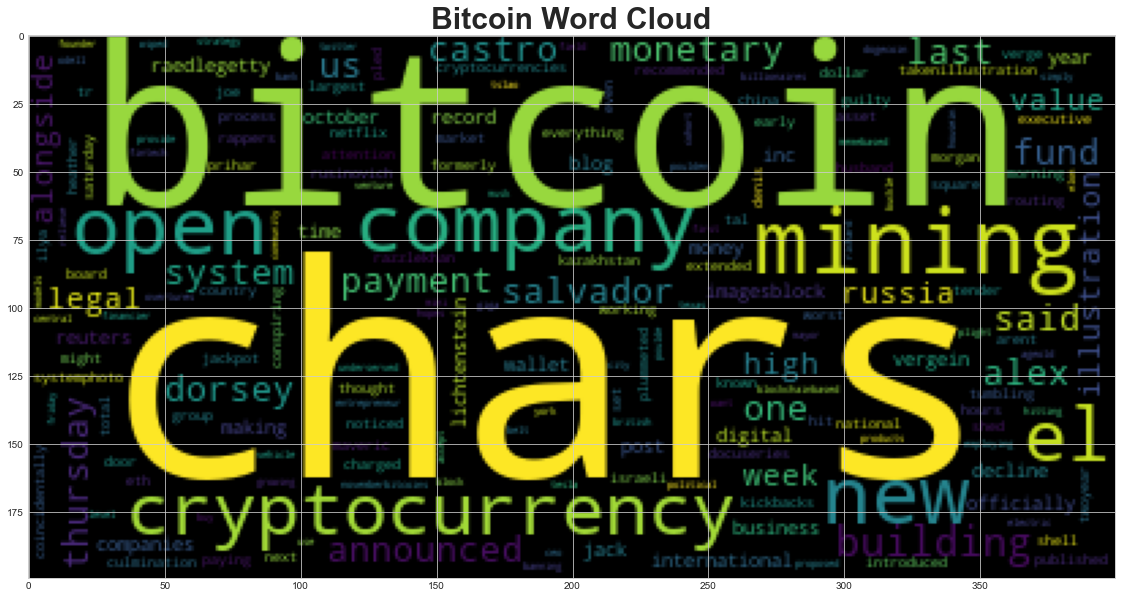

In [81]:
# Generate the Bitcoin word cloud
wc = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wc)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

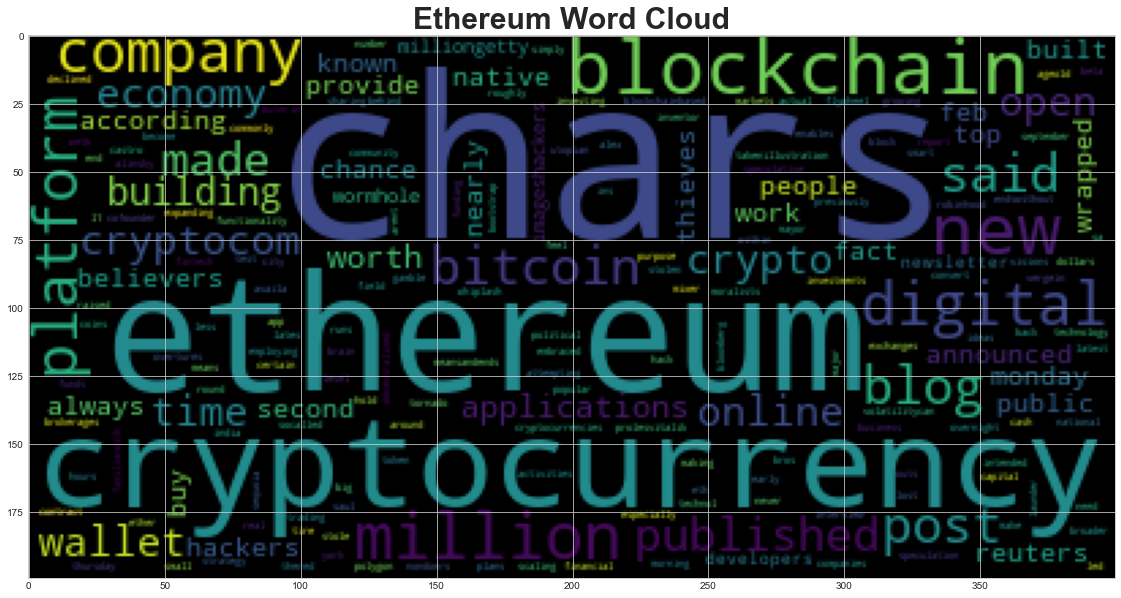

In [82]:
# Generate the Ethereum word cloud
wc = WordCloud(collocations=False).generate(' '.join(eth_tokens))
plt.imshow(wc)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [85]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [90]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [91]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [92]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title tov the document
doc.user_data["title"] = "Bitcoin NER"

In [93]:
# Render the visualization
displacy.render(doc, style='ent')

In [94]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

last week DATE
3 MONEY
Denis Rusinovich PERSON
Maveric Group ORG
Kazakhstan GPE
2017 DATE
China GPE
Russia GPE
El Salvador GPE
US GPE
2021 DATE
Alex Castro PERSON
Verge ORG
The International Monetary Fund’s ORG
El ORG
Bitcoin PERSON
Joe Raedle/Getty Images PERSON
Square FAC
Bitcoin PERSON
Israeli NORP
Tal Prihar PERSON
Illustration ORG
Alex Castro PERSON
Verge ORG
two-year DATE
4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
Netflix ORG
about one CARDINAL
Ilya Lichtenstein PERSON
this week DATE
Saturday DATE
more than 50% PERCENT
November DATE
more than $ MONEY
Jack Dorsey PERSON
Twitter PRODUCT
first ORDINAL
October last year DATE
the "Giga Texas ORG
Elon Musk PERSON
Friday DATE
Fintech ORG
New York City GPE
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Russia GPE
Thursday DATE
Russian NORP
the last five years DATE
about 25,000 CARDINAL
Lichtensteins PERSON
Bitcoin PERSON
El Salvador GPE
US GPE
The 

---

### Ethereum NER

In [95]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [96]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [97]:
# Render the visualization
displacy.render(doc, style='ent')

In [98]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

4,836 CARDINAL
ETH ORG
443 CARDINAL
Alex Castro PERSON
Verge ORG
the early hours TIME
Thursday DATE
morning TIME
roughly $15 million MONEY
Crypto.com ORG
Tornado Cash PERSON
Fintech ORG
New York City GPE
September DATE
Robinhood ORG
Crypto.com ORG
about $34 million MONEY
Monday DATE
Saul Alinsky Ethereum ORG
Ethereum ORG
Vitalik Buterin PERSON
Ethereum ORG
Feb 7 DATE
Reuters ORG
Monday DATE
$450 million MONEY
Sequoia Capital India ORG
OPEN ORG
second ORDINAL
OPEN ORG
second ORDINAL
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
120,000 CARDINAL
wEth ORG
Ethereum ORG
nearly $324 million MONEY
Getty Images PERSON
more than $324 million MONEY
Wormhole PERSON
Bloomberg TV ORG
Crypto.com ORG
Kris Marszalek PERSON
400 CARDINAL
British NORP
Richard ODell PERSON
house ORG
October DATE
Poulde GPE
Feb 4 DATE
Reuters ORG
8.82% PERCENT
40,611.4 MONEY
2202 DATE
Friday DATE
3,291.29 MONEY
Bitcoin PERSON
23.2% PERCENT
TIME ORG
weekly DATE
Vita ORG


---